# Product Sales: Optimizing Sales Strategy for New Product Line


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn grid style
sns.set_style('ticks')
sns.set_context('paper')
sns.set_palette('colorblind')
sns.set_style({'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '--'})


In [2]:
# Load the data
prod_sales = pd.read_csv('product_sales.csv')
prod_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
prod_sales.shape

(15000, 8)

# Data Validation

The data set has 15000 rows and 8 columns. I have validated all the variables and have made changes after validation. Not all the columns were as described in the data dictionary.

- week: `6` unique numeric values without missing values, same as the description. No cleaning is needed.
- sales_method: `5` character (string) values without missing values. Replaced `em + call`and `email` with `Email + Call` and `Email` respectively, ensuring there are only `3` unique sales methods (`Email`, `Call` and `Email + Call`).
- customer_id: Character values without missing values, same as the description. No cleaning is needed.
- nb_sold: Numeric values without missing values, same as the description. No cleaning is needed.
- revenue: Numeric values with `1074` missing values. Missing values imputed with the mean.
- years_as_customer: Numeric values without missing values but with two outlier values `47` and `63`. The two values are greater than 39, were considered outliers and deleted since the company was created in 1984 and we are in 2023.
- nb_site_visits: Numeric values without missing values, same as the description. No cleaning is needed.
- state: 50 unique character values without missing values, same as the description. No cleaning is needed.


In [4]:
# Check variable data types
prod_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
prod_sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [6]:
prod_sales['week'].unique()

array([2, 6, 5, 4, 3, 1])

In [7]:
# Check for missing values
prod_sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [8]:
# Percentage of missing values
print("Missing values for revenue: {:.2f}%".format(100 * prod_sales['revenue'].isnull().sum() / len(prod_sales)))

Missing values for revenue: 7.16%


In [9]:
# Check for duplicates
prod_sales.duplicated().sum()

0

In [10]:
# Check for outliers
prod_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [11]:
# Count number of records in years_as_customer column that are greater than 39
count = (prod_sales['years_as_customer'] > 39).sum()
count

2

In [12]:
# Identify outliers
outliers = prod_sales.loc[prod_sales['years_as_customer'] > 39, 'years_as_customer']

# Remove outliers from dataframe
prod_sales = prod_sales[~prod_sales['years_as_customer'].isin(outliers)]
prod_sales.shape

(14998, 8)

In [13]:
prod_sales['sales_method'].dtype

dtype('O')

In [14]:
prod_sales['sales_method'].value_counts()

Email           7455
Call            4961
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [15]:
# Handle missing values in the 'revenue' column by filling them with the mean value of that column
prod_sales['revenue'].fillna(prod_sales['revenue'].mean(), inplace=True)

# Replace "em + call" with "Email + Call" in servings 
prod_sales['sales_method'] = prod_sales['sales_method'].replace('em + call', 'Email + Call')

# Replace "email" with "Email" in servings 
prod_sales['sales_method'] = prod_sales['sales_method'].replace('email', 'Email')

In [16]:
# Check the number of missing values in each column again to confirm that there are no more missing values
prod_sales.isnull().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [17]:
# confirm changes
prod_sales['sales_method'].value_counts()

Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64

In [18]:
prod_sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [19]:
prod_sales['state'].nunique()

50

# Exploratory Analysis

I have performed EDA to answer the questions.


## How many customers were there for each approach?

From the bar and pie charts below, there `7465`, `4961` and `2572` customers for the `Email`, `Call` and `Email + Call` sales methods respectively. Therefore the `Email`, `Call` and `Email + Call` approaches have `49.8%`, `33.1%`, and `17.1%` of customers respectively.
- `Email` has the greatest number of customers, almost 50%. 
- `Email + Call`has the least number of customers.


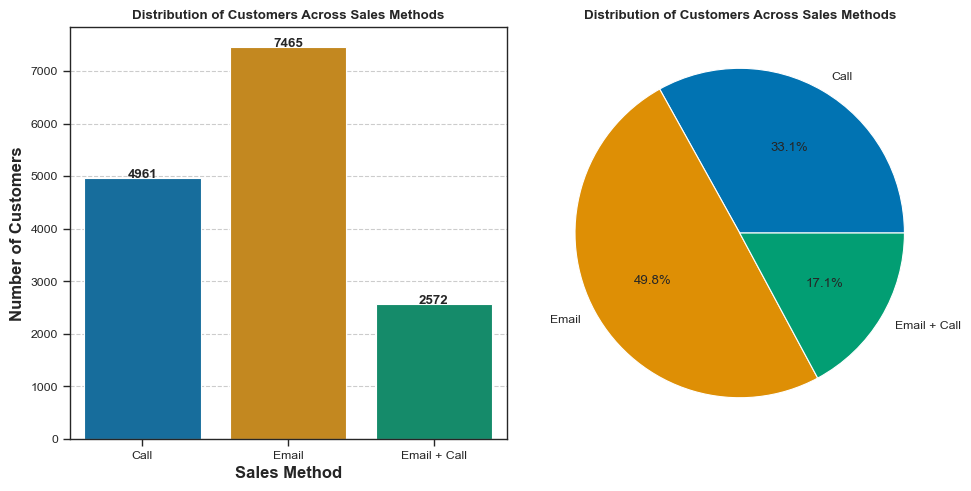

In [20]:
# Group data by sales_method and count number of customers
sales_data = prod_sales.groupby('sales_method')['customer_id'].count()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create bar chart
sns.barplot(x=sales_data.index, y=sales_data.values, ax=ax1)
ax1.set_title('Distribution of Customers Across Sales Methods', fontweight='bold')
ax1.set_xlabel('Sales Method', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Customers', fontweight='bold', fontsize=12)

# Add number of customers on top of each bar
for i, v in enumerate(sales_data.values):
    ax1.text(i, v+1, str(v), horizontalalignment='center', fontweight='bold')

# Create pie chart
ax2.pie(sales_data.values, labels=sales_data.index, autopct='%1.1f%%')
ax2.set_title('Distribution of Customers Across Sales Methods', fontweight='bold')

plt.tight_layout()
plt.savefig('customers_by_sales_method.png', dpi=300)
plt.show()


## What does the spread of the revenue look like overall? And for each method?

- From the histogram below, the overall revenue distribution is right-skewed, indicating that a few customers contribute significantly to the revenue.
- By sales methods as can be seen in the following boxplot, the most revenue comes from the `Email + Call` method followed by `Email` and then `Call`.


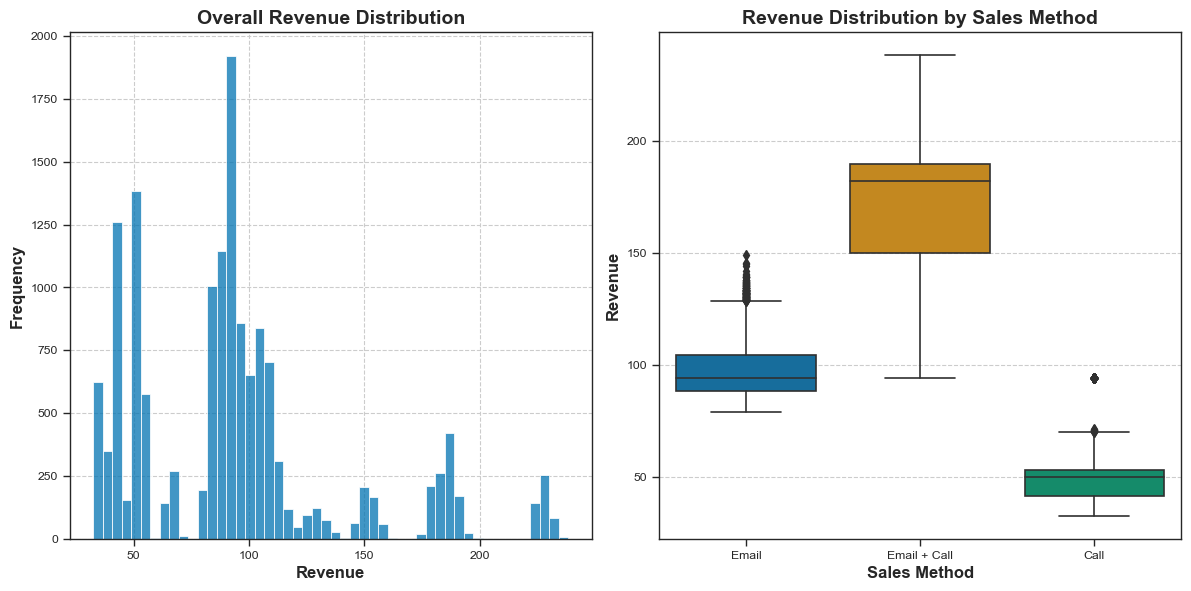

In [21]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.histplot(prod_sales['revenue'], bins=50, ax=axs[0])
axs[0].set_title('Overall Revenue Distribution', fontweight='bold', fontsize=14)
axs[0].set_xlabel('Revenue', fontweight='bold', fontsize=12)
axs[0].set_ylabel('Frequency', fontweight='bold', fontsize=12)

#sns.histplot(data=prod_sales, x='calories', ax=axs[0])
sns.boxplot(x='sales_method', y='revenue', data=prod_sales, ax=axs[1])
axs[1].set_title('Revenue Distribution by Sales Method', fontweight='bold', fontsize=14)
axs[1].set_xlabel('Sales Method', fontweight='bold', fontsize=12)
axs[1].set_ylabel('Revenue', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('revenue_by_sales_method.png', dpi=300)
plt.show()

## Was there any difference in revenue over time for each of the methods?

As can be seen the following line chart, there was a difference in revenue overtime for all three sales methods. 

- The `Email + Call` method consistently generates the highest revenue, making it a strategic choice for maximizing profits.
- The revenue generally fluctuates non-uniformly for each method as years go by.
- The revenue from `Email + Call` peaked  after about 29 years in `2013` (1984 plus 29) and then started dropping until it is currently same as that for `Email`.
- `Email + Call` revenue peaked in 2013, 29 years after the company was founded, and has since dropped to the same level as `Email`.
- The average revenue per customer has been increasing since launch of the new product line, with a small drop in the 3rd week.


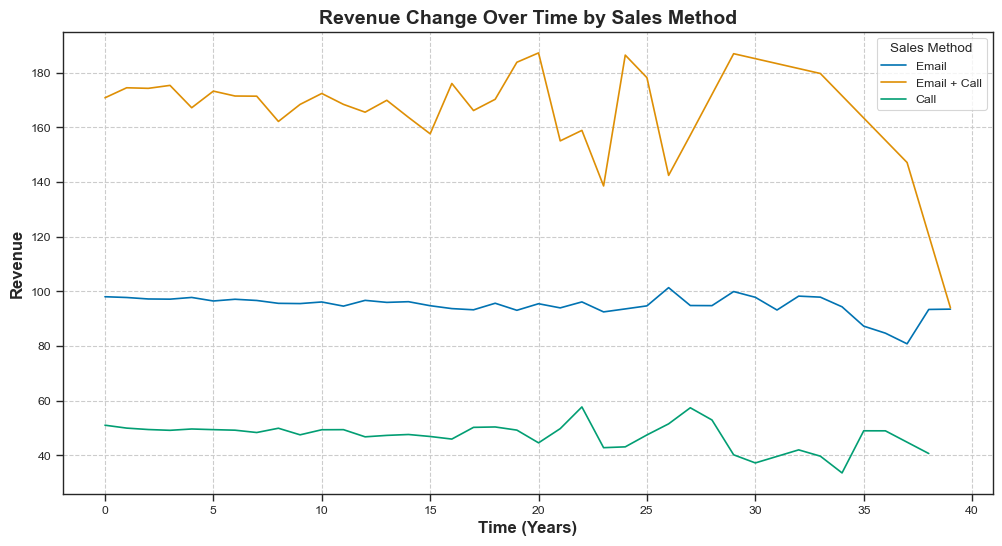

In [22]:
# Create a line chart for revenue over time for each sales method
plt.figure(figsize=(12, 6))  # Set the figure size

# Iterate over unique sales methods and plot a line for each
for method in prod_sales['sales_method'].unique():
    method_data = prod_sales[prod_sales['sales_method'] == method]
    sns.lineplot(x='years_as_customer', y='revenue', data=method_data, label=method, ci=None)

# Set labels and title
plt.xlabel('Time (Years)', fontweight='bold', fontsize=12)
plt.ylabel('Revenue', fontweight='bold', fontsize=12)
plt.title('Revenue Change Over Time by Sales Method', fontweight='bold', fontsize=14)

# Add a legend
plt.legend(title='Sales Method')

# Show the plot
plt.savefig('revenue_overtime_by_sales_method.png', dpi=300)
plt.show()

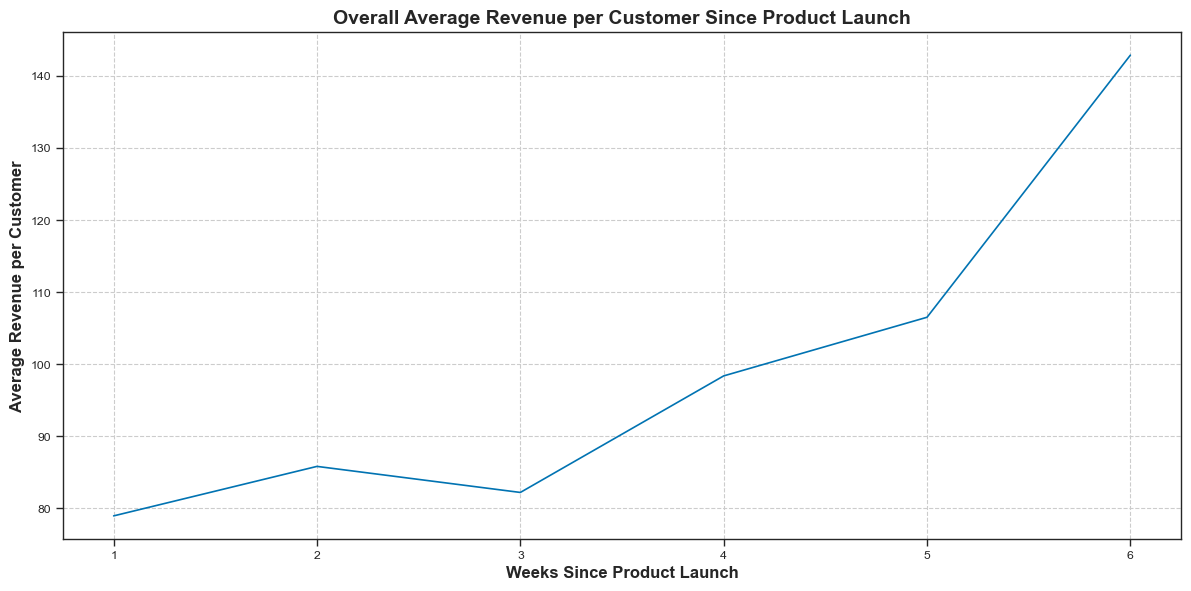

In [23]:
# Calculate average revenue per customer by week
avg_revenue_per_customer = prod_sales.groupby('week')['revenue'].mean().reset_index()

# Create a line plot for average revenue per customer by week
plt.figure(figsize=(12, 6))  # Set the figure size

# Use Seaborn to create a line plot
sns.lineplot(x='week', y='revenue', data=avg_revenue_per_customer)

# Set labels and title
plt.xlabel('Weeks Since Product Launch', fontweight='bold', fontsize=12)
plt.ylabel('Average Revenue per Customer', fontweight='bold', fontsize=12)
plt.title('Overall Average Revenue per Customer Since Product Launch', fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig('overall_avg_revenue_per_customer.png', dpi=300)
plt.show()

## Based on the data, which method would you recommend we continue to use?

Based on the data and barplot below, I would recommend we continue using the `Email + Call` method. 
- Despite having fewer customers, "Email + Call" generates the most revenue, indicating its effectiveness.
- Additionally, "Email + Call" offers a balance between customer engagement and time efficiency, making it a practical choice.
- Furthermore, the pair plot shows that the number of times the customer has visited our website in the last 6 months, `nb_site_visits` is normally distributed with the greatest mean being from `Email + Call`.


In [24]:
# Calculate summary statistics for revenue by sales method
revenue_stats = prod_sales.groupby('sales_method')['revenue'].agg(['mean', 'median', 'std']).round(2)

# Display summary statistics
print(revenue_stats)

                mean  median    std
sales_method                       
Call           49.29   49.93  12.12
Email          96.90   94.27  10.83
Email + Call  171.48  182.14  40.93


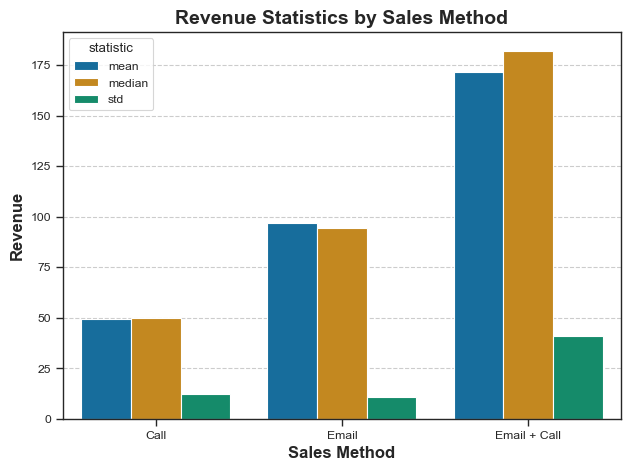

In [25]:
# Calculate summary statistics for revenue by sales method
revenue_stats = prod_sales.groupby('sales_method')['revenue'].agg(['mean', 'median', 'std']).round(2)

# Reset index to use sales method as a column
revenue_stats = revenue_stats.reset_index()

# Melt dataframe to long format for plotting
revenue_stats_melted = pd.melt(revenue_stats, id_vars='sales_method', var_name='statistic', value_name='value')

# Create bar chart using seaborn
sns.barplot(x='sales_method', y='value', hue='statistic', data=revenue_stats_melted)

# Set plot title and labels
plt.title('Revenue Statistics by Sales Method', fontweight='bold', fontsize=14)
plt.xlabel('Sales Method', fontweight='bold', fontsize=12)
plt.ylabel('Revenue', fontweight='bold', fontsize=12)

# Exclude index from the statistic
plt.xticks(ticks=range(len(revenue_stats['sales_method'])), labels=revenue_stats['sales_method'])

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display plot
plt.savefig('revenue_tatistics_by_sales_method.png', dpi=300)
plt.show()

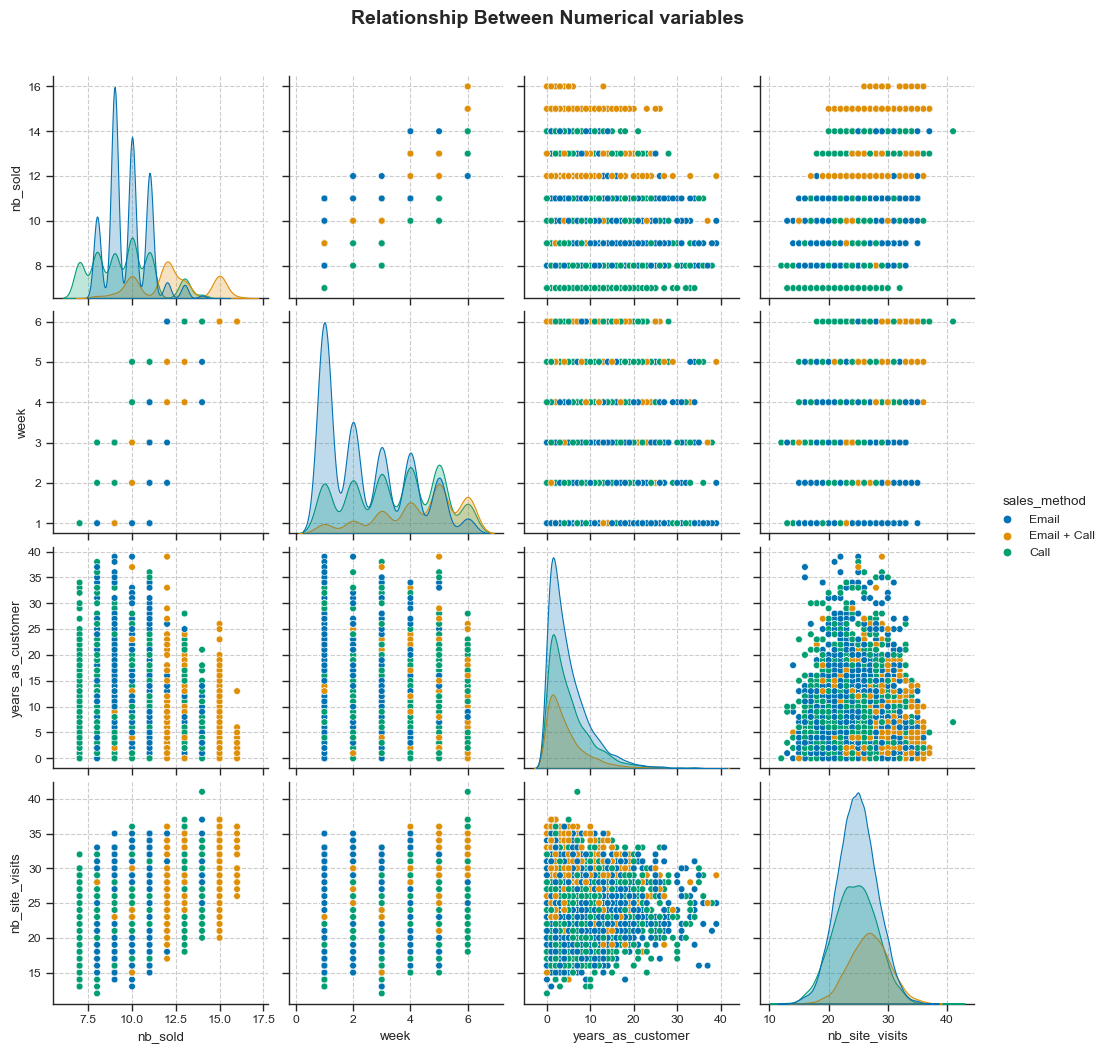

In [26]:
sns.pairplot(data=prod_sales, vars=['nb_sold', 'week', 'years_as_customer', 'nb_site_visits'], hue='sales_method')
plt.suptitle("Relationship Between Numerical variables", y=1.05, fontweight='bold', fontsize=14)
plt.savefig('pairplot.png', dpi=300)
plt.show()

# Metric for Business Monitoring

Since our goal is to find the most effective sales method for the new product line, I would recommend we use the **Average Revenue per Customer** as our metric for monitoring the effectiveness of the chosen sales method. 

Based on the available data, the overall average revenue per customer is approximately `$93.94`. However, the `Email + Call` method stands out with an average revenue per customer of `$171.48`, significantly higher than the other methods despite having the least number of customers.

Using this metric will allow the business to track and assess the performance of the sales method over time and make data-driven decisions.

In [27]:
# Calculate average revenue per customer
avg_revenue_per_customer = prod_sales['revenue'].sum() / prod_sales['customer_id'].nunique()

# Display average revenue per customer
print('Average Revenue per Customer: $', round(avg_revenue_per_customer, 2))

Average Revenue per Customer: $ 93.94


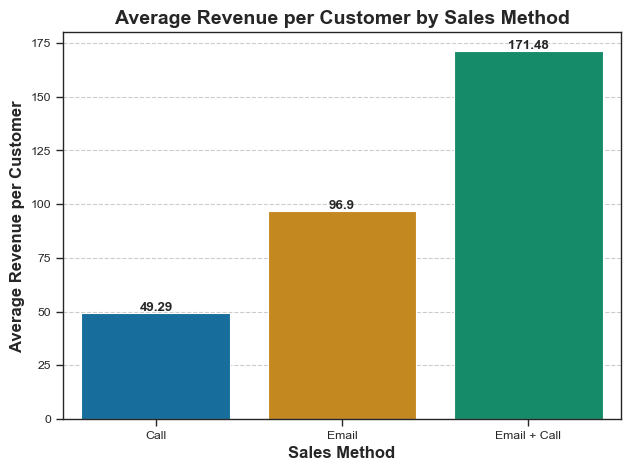

In [28]:
# Calculate average revenue per customer by sales method
avg_revenue_per_customer = prod_sales.groupby('sales_method')['revenue'].sum() / prod_sales.groupby('sales_method')['customer_id'].nunique()

# Create bar chart using seaborn
ax = sns.barplot(x=avg_revenue_per_customer.index, y=avg_revenue_per_customer.values)

# Add Average Revenue per Customer on top of each bar
for i, v in enumerate(avg_revenue_per_customer.values):
    ax.text(i, v+1, str(round(v, 2)), horizontalalignment='center', fontweight='bold')
    
# Set plot title and labels
plt.title('Average Revenue per Customer by Sales Method', fontweight='bold', fontsize=14)
plt.xlabel('Sales Method', fontweight='bold', fontsize=12)
plt.ylabel('Average Revenue per Customer', fontweight='bold', fontsize=12)

# Display plot
plt.tight_layout()
plt.savefig('avg_revenue_per_customer.png', dpi=300)
plt.show()

# Recommendations
- Based on the analysis, we should continue using the `Email + Call` sales method for the new product line.
- The metric for monitoring the effectiveness of the chosen sales method should be **Average Revenue per Customer**. It provides a clear and actionable measure for tracking the success of the sales strategy.
- It's essential to continuously monitor the chosen method's performance and make adjustments as needed to adapt to changing market conditions. 
- The company should consider the trade-off between customer volume and revenue when deciding on the sales method.

For future improvements of the product line, the company should consider the following.
- **Training and Development:** Invest in the training and development of the sales team to improve their effectiveness in customer interactions, regardless of the chosen sales method.
- **Data Quality Assurance:** Establish data validation and cleaning processes to ensure the accuracy and completeness of future data. High-quality data is essential for making informed decisions.
- **Customer Retention:** Focus on customer retention strategies in addition to customer acquisition. Satisfied and loyal customers can provide a steady source of revenue over time.

<center><b><i>The End!</i></b></center>